In [1]:
import numpy as np
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from mpl_toolkits import mplot3d
import time

In [2]:
from rawFLIR_polarization_data_extraction import *
from slope2height import *

In [3]:
NUM_IMAGES=1
BEDFORM = 'rocks'
file_location = "../FLIR_Camera/"+BEDFORM+"_fastFlow_ShallowH_test1_centeredCam_flume_LookAngle_35Deg"
ref_image_name = 'reference.tiff'
figures_location = "../FLIR_Camera/"+BEDFORM+"_fastFlow_ShallowH_test1_centeredCam_flume_LookAngle_35Deg_FIGURES"
height_figs_location  = "../FLIR_Camera/"+BEDFORM+"_fastFlow_ShallowH_test1_centeredCam_flume_LookAngle_35Deg_HEIGHT_FIGURES"
save_location =  "../FLIR_Camera"
data_filename = BEDFORM + "_fastFlow_ShallowH_test1.pickle"
dark_files_location = "../FLIR_Camera/dark_imgs"
flat_files_location = "../FLIR_Camera/flat_imgs"

In [4]:
filenames = os.listdir(file_location)
filenames.remove(ref_image_name) 

In [5]:
print(len(filenames))

75


Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.06096625328063965 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.051969051361083984 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


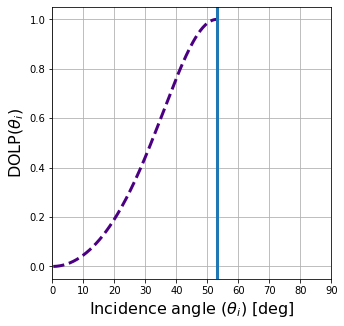

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.525156497955322 seconds
False
AoLP time:  0.05396842956542969 s


In [6]:
im_theta1, im_phi1 = theta_phi(ref_image_name, file_location,
                               material = 'water',
                               flat_field_correct = 1,
                               gaussian_smoothing_sigma = 0,
                               dark_files_location= dark_files_location, flat_files_location= flat_files_location,
                               num_images= NUM_IMAGES, correction_angle=0)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0359799861907959 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04998421669006348 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


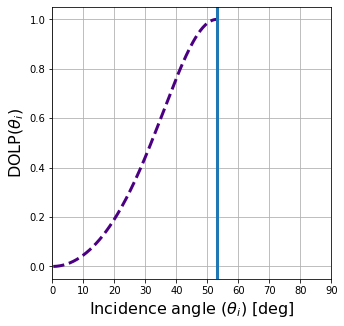

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.20405626296997 seconds
False
AoLP time:  0.05196881294250488 s


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:26<00:00, 26.98s/it]


In [7]:
for filename2 in tqdm(filenames[0:1]): #
    im_theta2, im_phi2 = theta_phi(filename2, file_location,
                               material = 'water',
                               flat_field_correct = 1,
                               gaussian_smoothing_sigma = 0,
                               dark_files_location= dark_files_location, flat_files_location= flat_files_location,
                               num_images= NUM_IMAGES, correction_angle=0)

    raw_img2 = cv2.imread(os.path.join(file_location, filename2))

<Figure size 432x288 with 0 Axes>

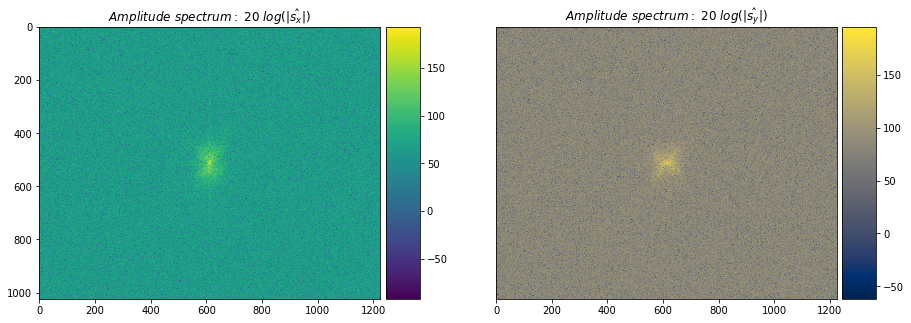

<Figure size 432x288 with 0 Axes>

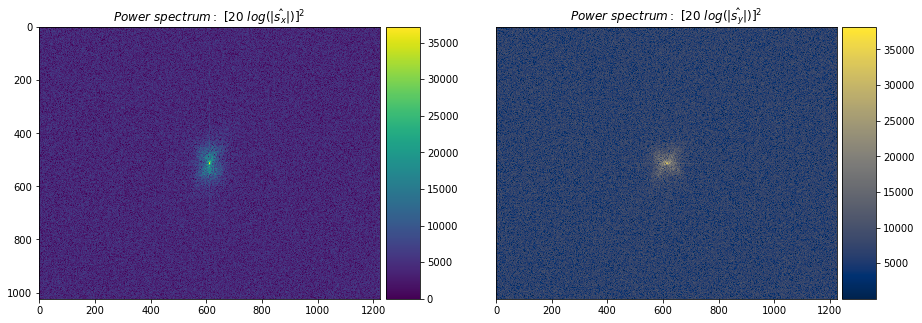

In [8]:
s_x = np.tan(np.radians((im_theta2 - im_theta1)))
s_y = np.tan(np.radians((im_phi2 - im_phi1)))
s_hat_x, s_hat_y = slopeFieldFFT(s_x, s_y)
height_map = slope2height(s_hat_x, s_hat_y)

<Figure size 432x288 with 0 Axes>

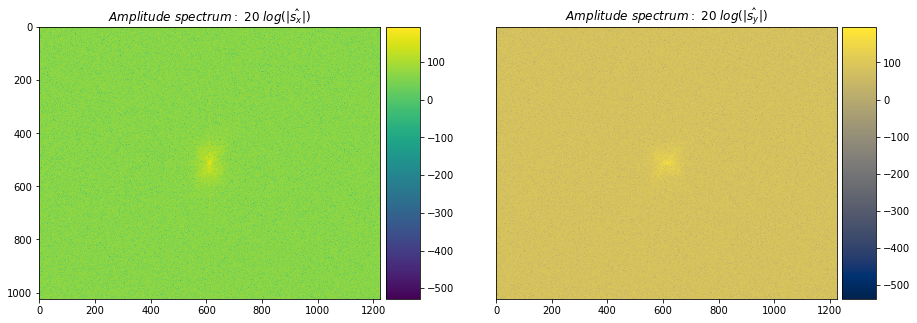

<Figure size 432x288 with 0 Axes>

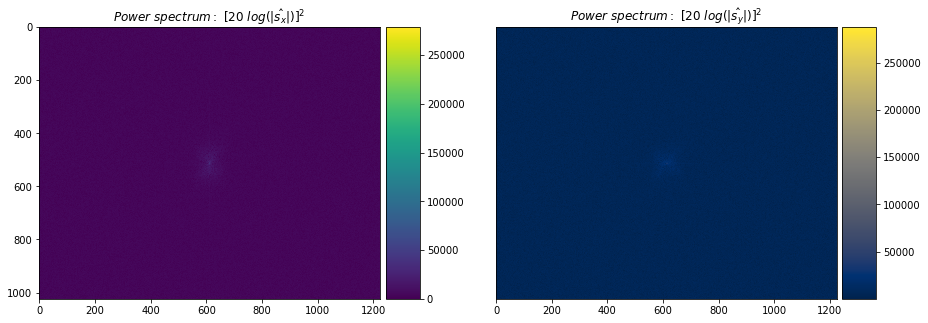

In [9]:
s_hat_x_noDC, s_hat_y_noDC = slopeFieldFFT(s_x - np.mean(s_x), s_y - np.mean(s_y))

When the input a is a time-domain signal and A = fft(a), np.abs(A) is its amplitude spectrum and np.abs(A)**2 is its power spectrum. The phase spectrum is obtained by np.angle(A).

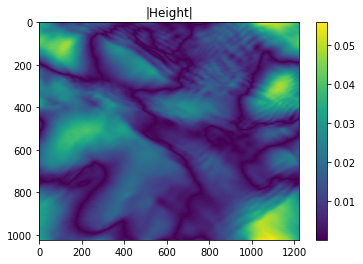

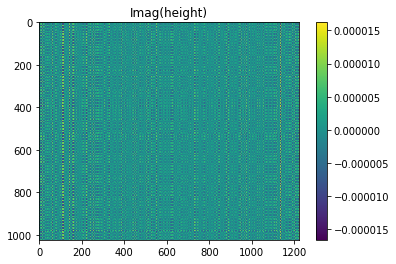

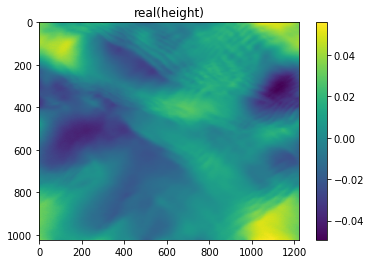

In [10]:
plt.figure()
plt.imshow(np.abs(height_map))
plt.colorbar()
plt.title('|Height|')
plt.show()

plt.figure()
plt.imshow(np.imag(height_map))
plt.colorbar()
plt.title('Imag(height)')
plt.show()

plt.figure()
plt.imshow(np.real(height_map))
plt.colorbar()
plt.title('real(height)')
plt.show()



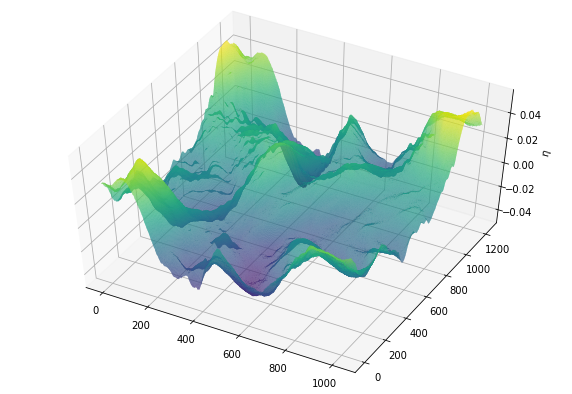

28.6193904876709


In [11]:
# %matplotlib widget
rows, cols = s_x.shape
Z = np.real(height_map)
X,Y = np.meshgrid(np.arange(0,cols), np.arange(0,rows))

fig = plt.figure(figsize = (10,7)) 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 

tic = time.time()
# syntax for plotting 
p = ax.plot_surface(Y, X, Z, cmap ='viridis', rstride = 2, cstride = 2)#, edgecolor ='green') 
# ax.set_title('Height map')
ax.set_zlabel('$\\eta$')
ax.view_init(azim = -61, elev = 52)
plt.show() 
toc = time.time()
print(toc-tic)

# SAVE the height, slope, raw data maps

In [12]:
all_height_maps = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(filenames)))
all_sx_maps = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(filenames)))
all_sy_maps = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(filenames)))
all_raw_frames_0filter = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(filenames)))

  0%|                                                                                           | 0/75 [00:00<?, ?it/s]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03897833824157715 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04897308349609375 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


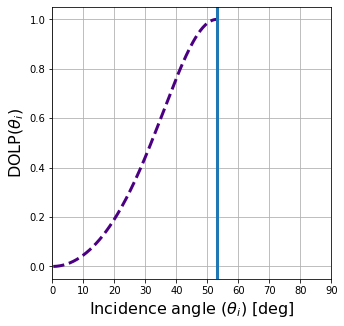

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.27773404121399 seconds
False
AoLP time:  0.05097174644470215 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  1%|█                                                                                  | 1/75 [00:28<35:18, 28.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.046971797943115234 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0699605941772461 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


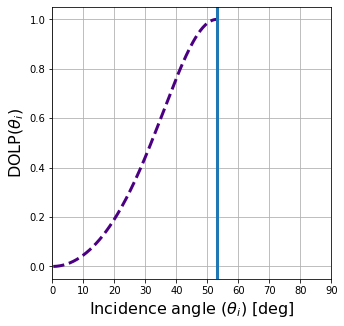

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.764350652694702 seconds
False
AoLP time:  0.05019497871398926 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  3%|██▏                                                                                | 2/75 [00:56<34:40, 28.50s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.04097414016723633 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.08195185661315918 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


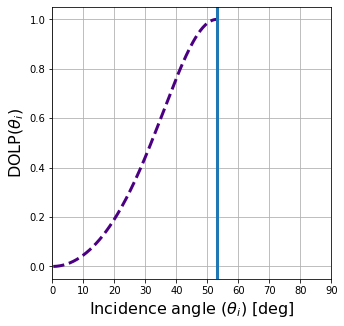

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.13596773147583 seconds
False
AoLP time:  0.06995844841003418 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  4%|███▎                                                                               | 3/75 [01:26<34:30, 28.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029983043670654297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.042975425720214844 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


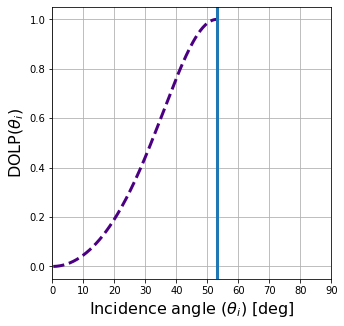

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.605393409729004 seconds
False
AoLP time:  0.04097604751586914 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  5%|████▍                                                                              | 4/75 [01:57<34:48, 29.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028981924057006836 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0379793643951416 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


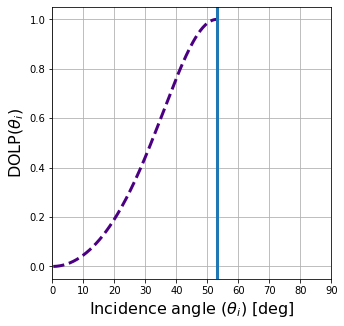

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.010937452316284 seconds
False
AoLP time:  0.041974782943725586 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  7%|█████▌                                                                             | 5/75 [02:28<34:52, 29.90s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03098273277282715 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976980209350586 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


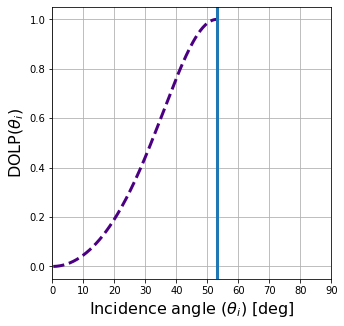

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.901276350021362 seconds
False
AoLP time:  0.04397892951965332 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  8%|██████▋                                                                            | 6/75 [02:59<34:53, 30.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.057965755462646484 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097771644592285 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


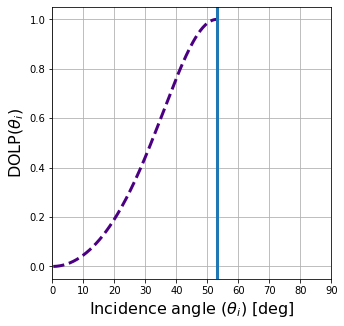

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.52917790412903 seconds
False
AoLP time:  0.06496191024780273 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  9%|███████▋                                                                           | 7/75 [03:34<36:06, 31.86s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


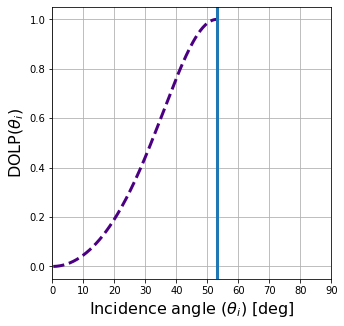

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.55519390106201 seconds
False
AoLP time:  0.04297494888305664 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 11%|████████▊                                                                          | 8/75 [04:07<35:45, 32.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.04797196388244629 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05196952819824219 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


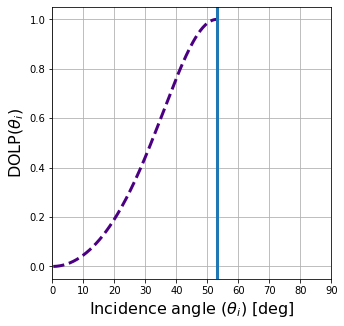

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.92342972755432 seconds
False
AoLP time:  0.04897427558898926 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 12%|█████████▉                                                                         | 9/75 [04:39<35:20, 32.13s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026004314422607422 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0380096435546875 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


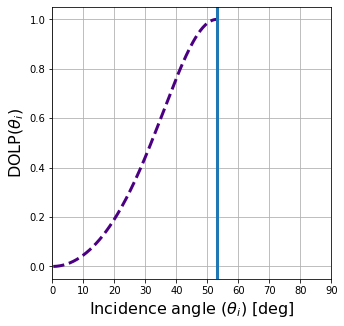

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  31.7313289642334 seconds
False
AoLP time:  0.049128055572509766 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 13%|██████████▉                                                                       | 10/75 [05:16<36:18, 33.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030984163284301758 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039484262466430664 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


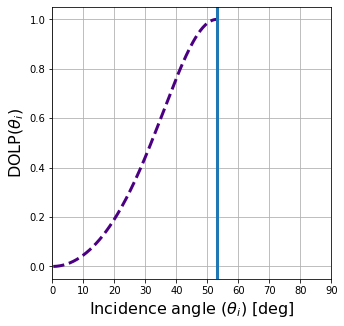

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.04192304611206 seconds
False
AoLP time:  0.042482852935791016 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 15%|████████████                                                                      | 11/75 [05:48<35:14, 33.03s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029981613159179688 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977622985839844 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


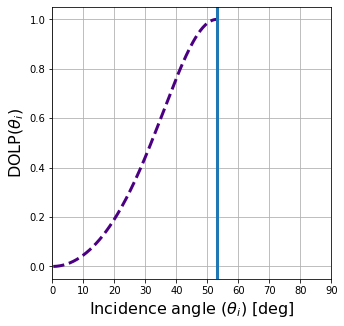

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  28.58808159828186 seconds
False
AoLP time:  0.06896018981933594 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 16%|█████████████                                                                     | 12/75 [06:22<34:53, 33.23s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798318862915039 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977312088012695 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


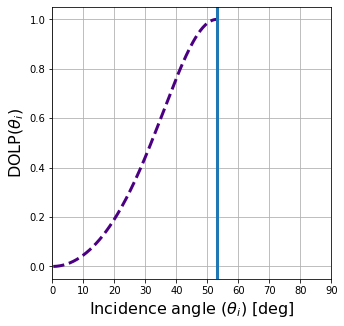

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.05229926109314 seconds
False
AoLP time:  0.05796623229980469 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 17%|██████████████▏                                                                   | 13/75 [06:56<34:47, 33.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.048972129821777344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04497337341308594 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


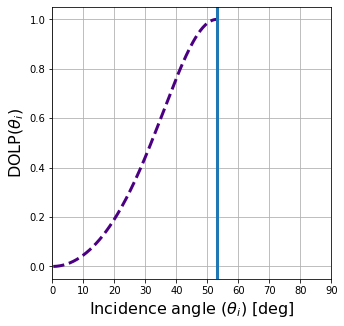

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  27.207680225372314 seconds
False
AoLP time:  0.04097485542297363 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 19%|███████████████▎                                                                  | 14/75 [07:29<34:05, 33.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030982255935668945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.046971797943115234 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


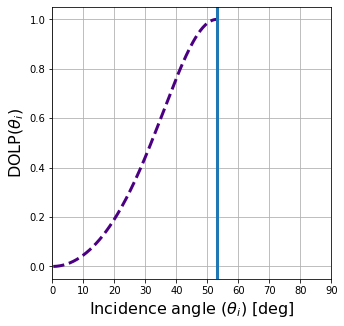

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.821917057037354 seconds
False
AoLP time:  0.0439753532409668 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 20%|████████████████▍                                                                 | 15/75 [08:05<34:11, 34.20s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03697800636291504 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.07695627212524414 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


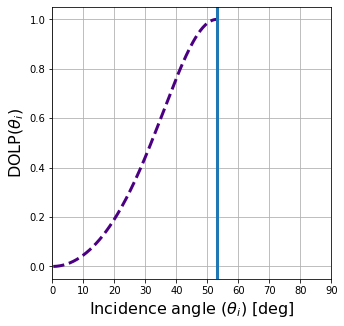

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.16125202178955 seconds
False
AoLP time:  0.06895875930786133 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 21%|█████████████████▍                                                                | 16/75 [08:40<33:46, 34.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0419769287109375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05496692657470703 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


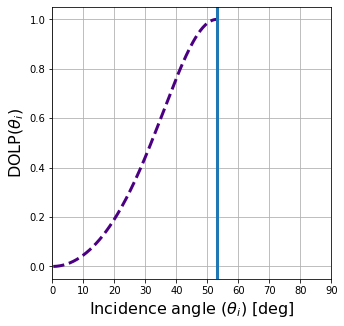

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.409258604049683 seconds
False
AoLP time:  0.04597330093383789 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 23%|██████████████████▌                                                               | 17/75 [09:11<32:21, 33.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03148984909057617 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03798174858093262 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


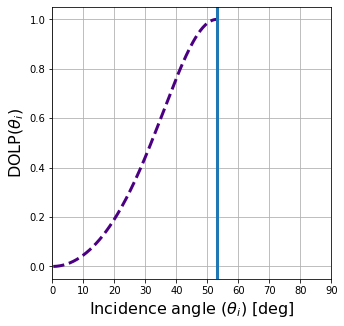

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.983417510986328 seconds
False
AoLP time:  0.042975425720214844 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 24%|███████████████████▋                                                              | 18/75 [09:41<30:48, 32.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983354568481445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


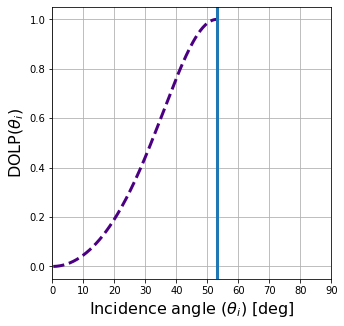

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.430797576904297 seconds
False
AoLP time:  0.05896639823913574 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 25%|████████████████████▊                                                             | 19/75 [10:11<29:25, 31.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897595405578613 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


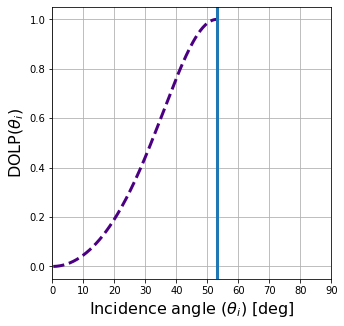

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.93199610710144 seconds
False
AoLP time:  0.045972347259521484 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 27%|█████████████████████▊                                                            | 20/75 [10:42<28:47, 31.40s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.05696821212768555 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05896735191345215 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


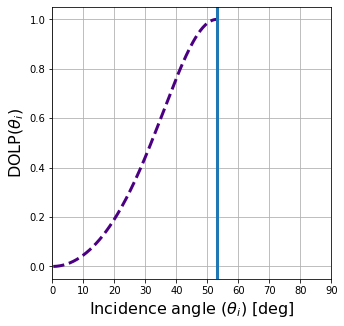

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.52384877204895 seconds
False
AoLP time:  0.04596972465515137 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 28%|██████████████████████▉                                                           | 21/75 [11:18<29:26, 32.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03897523880004883 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.050005435943603516 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


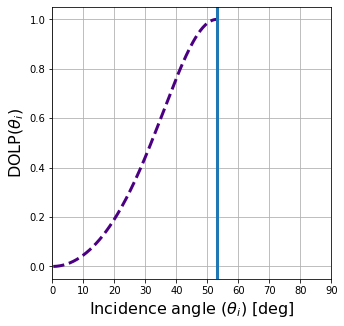

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.733815670013428 seconds
False
AoLP time:  0.07895374298095703 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 29%|████████████████████████                                                          | 22/75 [11:53<29:38, 33.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03997397422790527 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04797029495239258 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


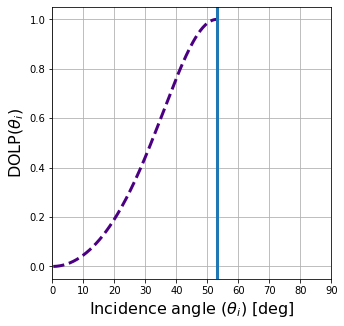

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  28.66771626472473 seconds
False
AoLP time:  0.04797101020812988 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 31%|█████████████████████████▏                                                        | 23/75 [12:28<29:20, 33.85s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982328414916992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977622985839844 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


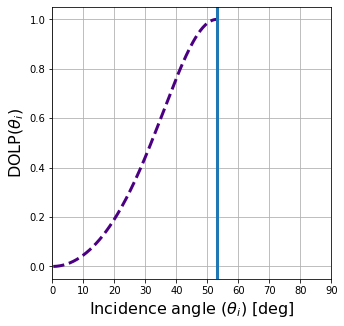

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.594701766967773 seconds
False
AoLP time:  0.044973134994506836 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 32%|██████████████████████████▏                                                       | 24/75 [13:03<29:11, 34.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798318862915039 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977073669433594 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


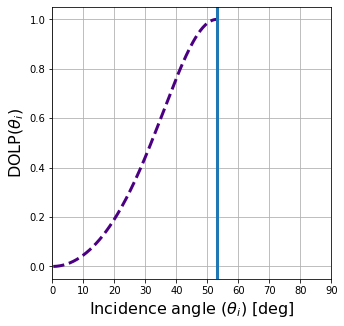

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  28.489864110946655 seconds
False
AoLP time:  0.04197502136230469 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 33%|███████████████████████████▎                                                      | 25/75 [13:37<28:33, 34.27s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03098130226135254 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797650337219238 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


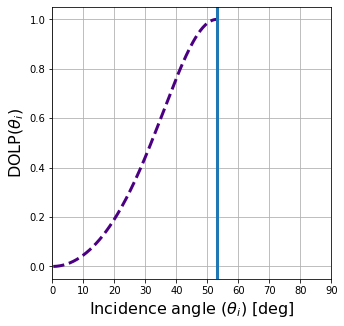

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.488547563552856 seconds
False
AoLP time:  0.04197978973388672 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 35%|████████████████████████████▍                                                     | 26/75 [14:13<28:14, 34.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982805252075195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0419774055480957 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


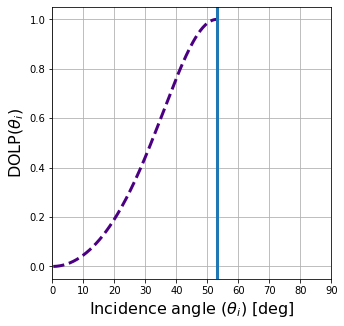

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  31.684229850769043 seconds
False
AoLP time:  0.04997062683105469 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 36%|█████████████████████████████▌                                                    | 27/75 [14:50<28:17, 35.37s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.038550615310668945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297494888305664 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


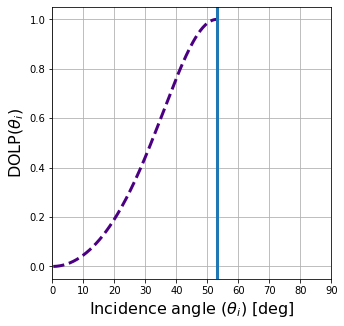

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  31.264669179916382 seconds
False
AoLP time:  0.06396245956420898 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 37%|██████████████████████████████▌                                                   | 28/75 [15:27<28:10, 35.98s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.13592123985290527 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05196976661682129 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


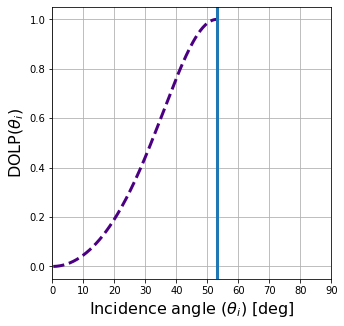

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  31.58172059059143 seconds
False
AoLP time:  0.05296921730041504 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 39%|███████████████████████████████▋                                                  | 29/75 [16:05<28:01, 36.55s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03298068046569824 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05096912384033203 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


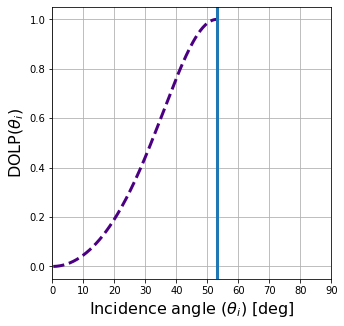

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  31.533010721206665 seconds
False
AoLP time:  0.04797220230102539 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 40%|████████████████████████████████▊                                                 | 30/75 [16:43<27:37, 36.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.04197549819946289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04797220230102539 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


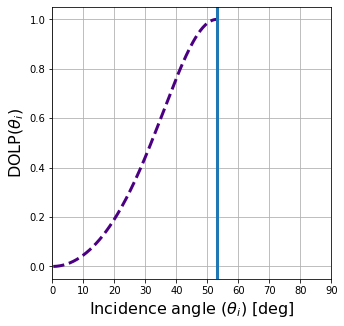

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  30.370065927505493 seconds
False
AoLP time:  0.05596494674682617 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 41%|█████████████████████████████████▉                                                | 31/75 [17:19<26:57, 36.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039981842041015625 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


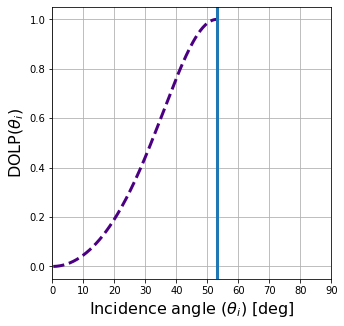

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  30.454513549804688 seconds
False
AoLP time:  0.06696319580078125 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 43%|██████████████████████████████████▉                                               | 32/75 [17:56<26:15, 36.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03098011016845703 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.040973663330078125 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


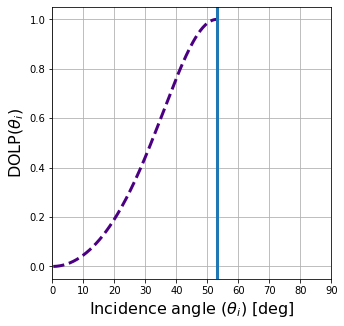

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  27.64415144920349 seconds
False
AoLP time:  0.04897046089172363 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 44%|████████████████████████████████████                                              | 33/75 [18:29<24:59, 35.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.036977529525756836 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05796551704406738 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


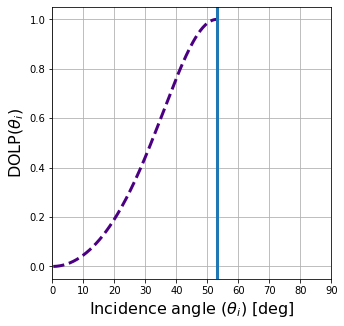

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.715362548828125 seconds
False
AoLP time:  0.0439760684967041 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 45%|█████████████████████████████████████▏                                            | 34/75 [19:01<23:41, 34.67s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898097038269043 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978960037231445 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


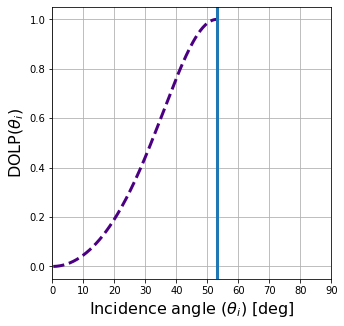

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.4975643157959 seconds
False
AoLP time:  0.040975332260131836 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 47%|██████████████████████████████████████▎                                           | 35/75 [19:32<22:18, 33.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02998185157775879 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997540473937988 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


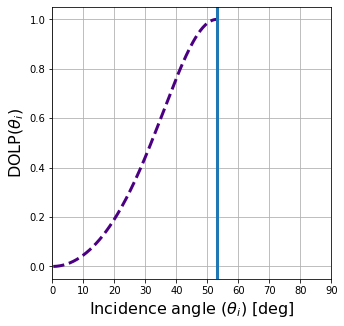

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.971054553985596 seconds
False
AoLP time:  0.053969621658325195 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 48%|███████████████████████████████████████▎                                          | 36/75 [20:03<21:18, 32.77s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0279848575592041 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297447204589844 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


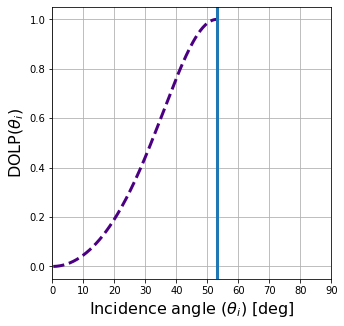

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.328880310058594 seconds
False
AoLP time:  0.05646634101867676 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 49%|████████████████████████████████████████▍                                         | 37/75 [20:33<20:13, 31.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030980825424194336 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977312088012695 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


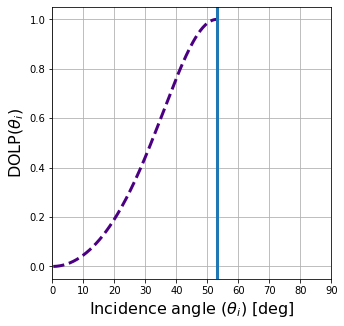

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.90442991256714 seconds
False
AoLP time:  0.04697155952453613 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 51%|█████████████████████████████████████████▌                                        | 38/75 [21:01<18:59, 30.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030981779098510742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797721862792969 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


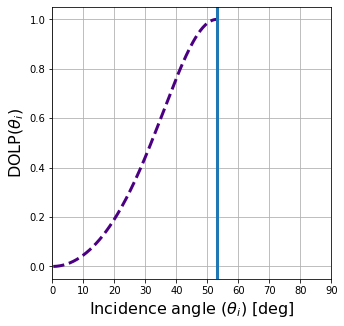

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.83925771713257 seconds
False
AoLP time:  0.04597353935241699 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 52%|██████████████████████████████████████████▋                                       | 39/75 [21:32<18:28, 30.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030982255935668945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977622985839844 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


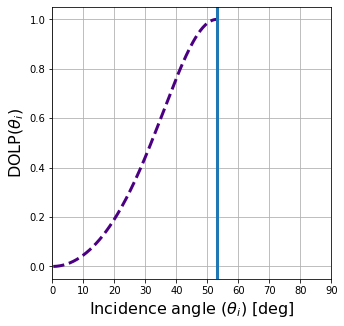

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.71653151512146 seconds
False
AoLP time:  0.053968191146850586 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 53%|███████████████████████████████████████████▋                                      | 40/75 [22:03<17:57, 30.78s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03498029708862305 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03848433494567871 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


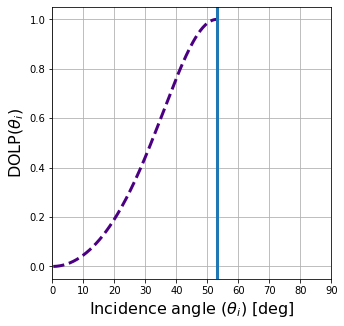

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  28.72205114364624 seconds
False
AoLP time:  0.041974544525146484 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 55%|████████████████████████████████████████████▊                                     | 41/75 [22:37<17:59, 31.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029981613159179688 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097557067871094 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


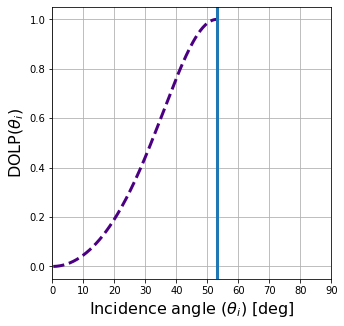

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.333462238311768 seconds
False
AoLP time:  0.04597616195678711 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 56%|█████████████████████████████████████████████▉                                    | 42/75 [23:07<17:15, 31.37s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


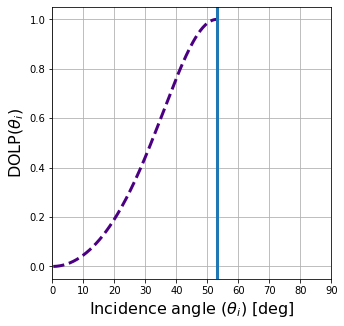

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.668501138687134 seconds
False
AoLP time:  0.05496573448181152 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 57%|███████████████████████████████████████████████                                   | 43/75 [23:38<16:32, 31.03s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03298163414001465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.041976213455200195 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


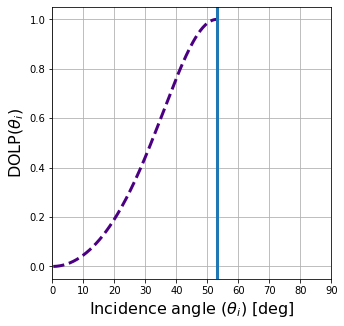

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.264697551727295 seconds
False
AoLP time:  0.056966543197631836 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 59%|████████████████████████████████████████████████                                  | 44/75 [24:07<15:48, 30.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03197836875915527 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03799700736999512 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


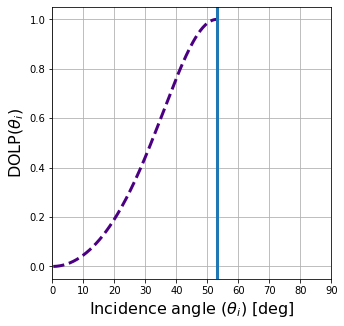

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.395036220550537 seconds
False
AoLP time:  0.05696582794189453 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 60%|█████████████████████████████████████████████████▏                                | 45/75 [24:39<15:29, 30.97s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698349952697754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977073669433594 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


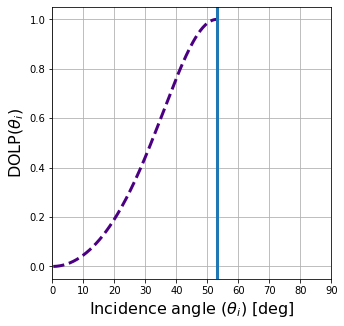

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.012101888656616 seconds
False
AoLP time:  0.04988598823547363 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 61%|██████████████████████████████████████████████████▎                               | 46/75 [25:11<15:05, 31.23s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


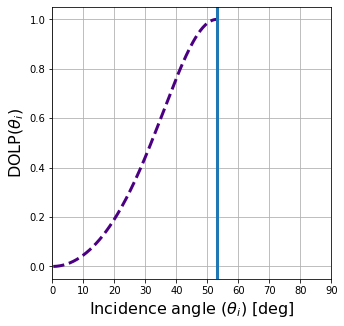

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.628263235092163 seconds
False
AoLP time:  0.05696749687194824 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 63%|███████████████████████████████████████████████████▍                              | 47/75 [25:43<14:44, 31.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03202533721923828 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0479736328125 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


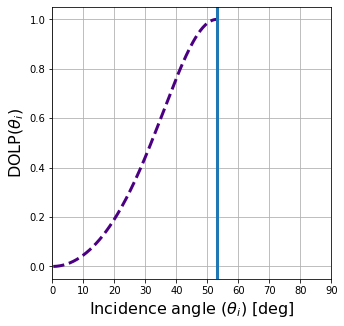

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.806962728500366 seconds
False
AoLP time:  0.04297351837158203 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 64%|████████████████████████████████████████████████████▍                             | 48/75 [26:13<13:56, 30.98s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983354568481445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


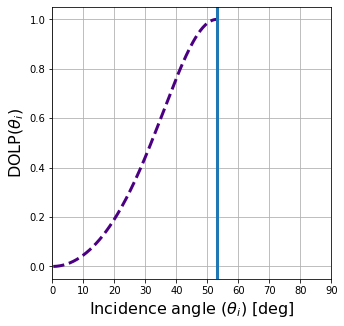

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.18896746635437 seconds
False
AoLP time:  0.04795527458190918 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 65%|█████████████████████████████████████████████████████▌                            | 49/75 [26:41<13:03, 30.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983592987060547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


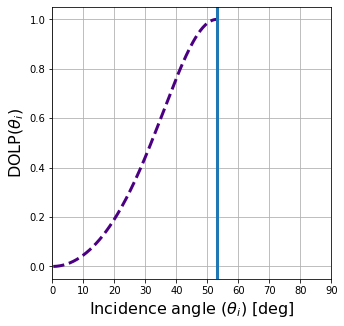

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.378453254699707 seconds
False
AoLP time:  0.041976213455200195 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 67%|██████████████████████████████████████████████████████▋                           | 50/75 [27:08<12:11, 29.25s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982566833496094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04702496528625488 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


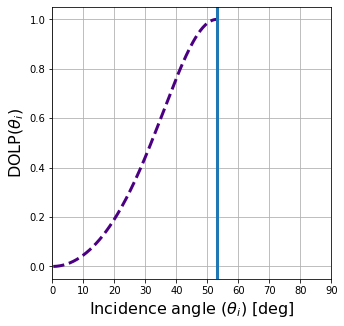

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.7334725856781 seconds
False
AoLP time:  0.05296897888183594 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 68%|███████████████████████████████████████████████████████▊                          | 51/75 [27:41<12:04, 30.21s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03498053550720215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04599785804748535 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


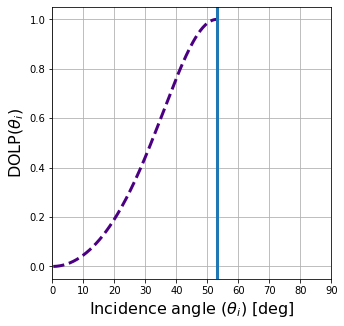

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.977668046951294 seconds
False
AoLP time:  0.04897308349609375 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 69%|████████████████████████████████████████████████████████▊                         | 52/75 [28:13<11:50, 30.89s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982805252075195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097747802734375 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


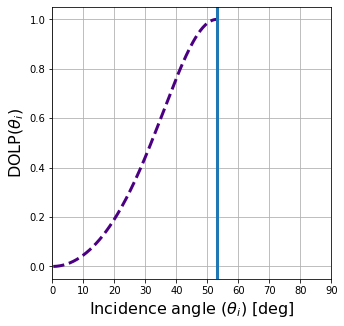

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.00605058670044 seconds
False
AoLP time:  0.04996991157531738 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [28:43<11:15, 30.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.032982826232910156 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0379788875579834 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


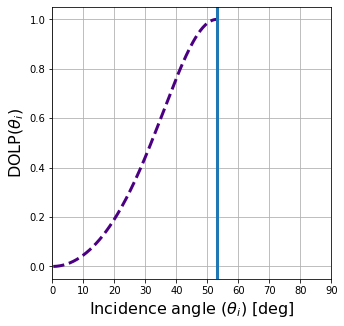

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.994096755981445 seconds
False
AoLP time:  0.041975975036621094 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 72%|███████████████████████████████████████████████████████████                       | 54/75 [29:16<10:54, 31.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.032979488372802734 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04001331329345703 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


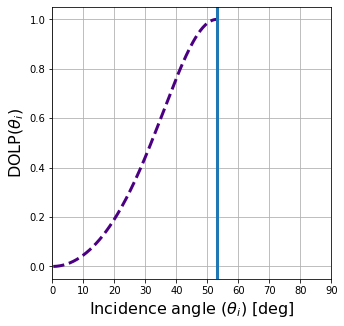

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.124056100845337 seconds
False
AoLP time:  0.0519719123840332 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [29:47<10:27, 31.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


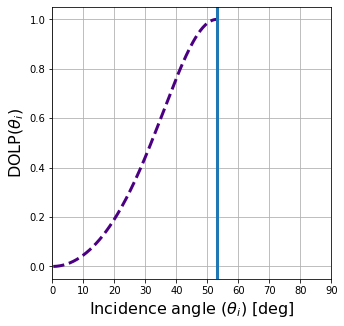

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  27.44847321510315 seconds
False
AoLP time:  0.06296300888061523 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [30:20<10:04, 31.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03497910499572754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


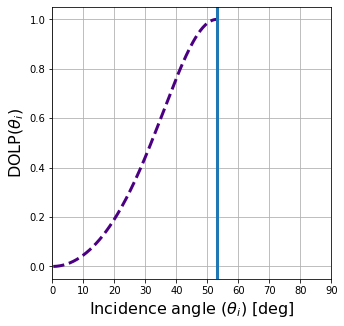

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.718891382217407 seconds
False
AoLP time:  0.04095721244812012 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [30:48<09:11, 30.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027982473373413086 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039975643157958984 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


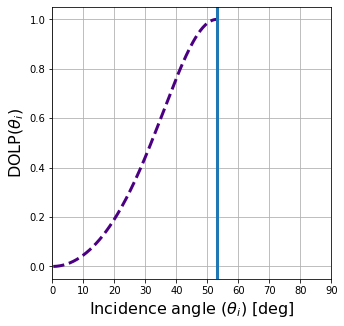

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.21060609817505 seconds
False
AoLP time:  0.04097628593444824 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [31:16<08:28, 29.92s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03197884559631348 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033978939056396484 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


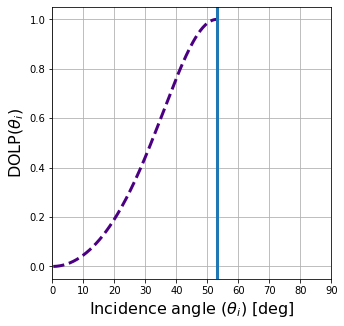

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.113223552703857 seconds
False
AoLP time:  0.0459744930267334 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [31:43<07:44, 29.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030982255935668945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036977529525756836 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


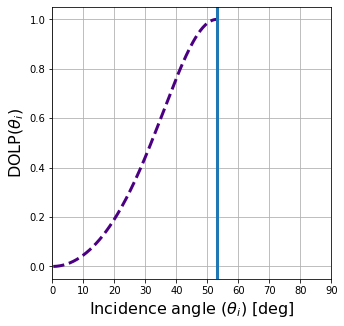

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  21.801403522491455 seconds
False
AoLP time:  0.04197549819946289 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [32:10<07:04, 28.33s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035978078842163086 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


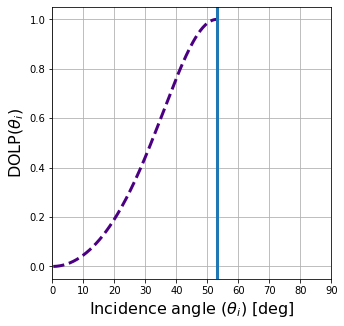

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.039266109466553 seconds
False
AoLP time:  0.04797172546386719 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [32:37<06:31, 27.95s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026982545852661133 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897976875305176 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


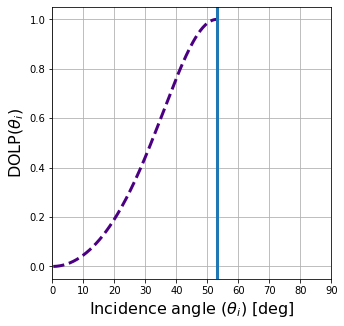

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.23415231704712 seconds
False
AoLP time:  0.04097604751586914 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [33:04<05:59, 27.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026982545852661133 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0359799861907959 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


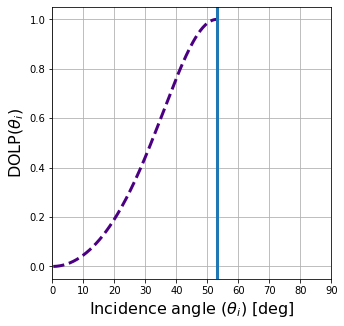

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.087239503860474 seconds
False
AoLP time:  0.041975975036621094 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [33:31<05:29, 27.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698516845703125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597760200500488 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


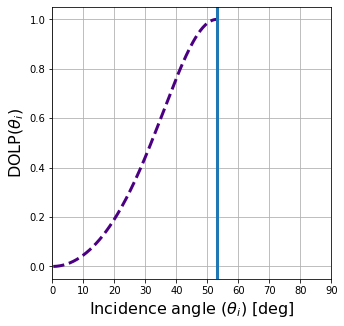

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  28.756885051727295 seconds
False
AoLP time:  0.06795883178710938 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [34:05<05:22, 29.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.04697394371032715 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05296826362609863 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


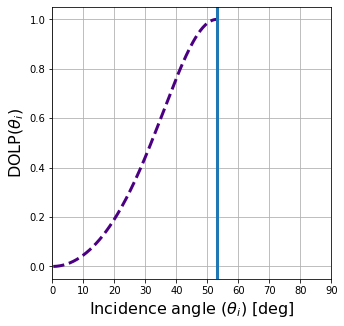

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.99041748046875 seconds
False
AoLP time:  0.05498623847961426 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [34:37<05:03, 30.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030982017517089844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097485542297363 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


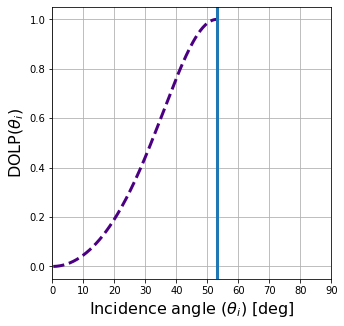

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.922301054000854 seconds
False
AoLP time:  0.04097628593444824 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [35:10<04:38, 30.92s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03198122978210449 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


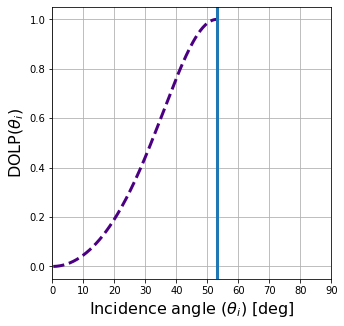

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.488507747650146 seconds
False
AoLP time:  0.043975114822387695 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [35:41<04:08, 31.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982566833496094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03699159622192383 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


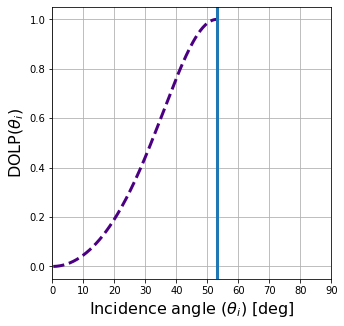

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.528315544128418 seconds
False
AoLP time:  0.04397273063659668 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [36:13<03:38, 31.17s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.035979509353637695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.043973684310913086 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


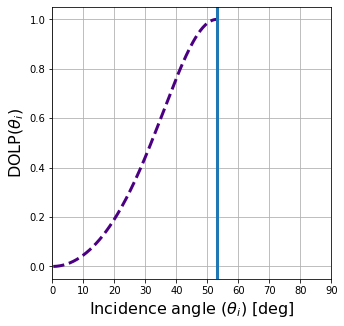

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.984036922454834 seconds
False
AoLP time:  0.045974016189575195 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [36:45<03:09, 31.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030981063842773438 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036980390548706055 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


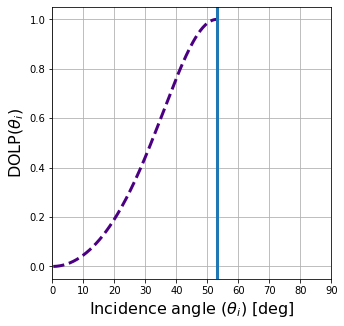

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.645758628845215 seconds
False
AoLP time:  0.04796910285949707 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [37:15<02:35, 31.00s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029572725296020508 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0370020866394043 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


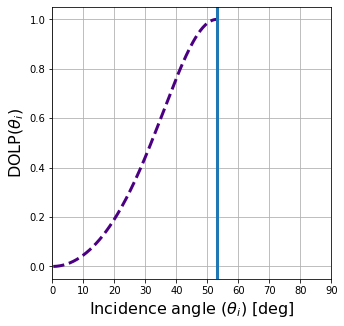

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.323158264160156 seconds
False
AoLP time:  0.05996561050415039 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [37:44<02:02, 30.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030981779098510742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04397463798522949 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


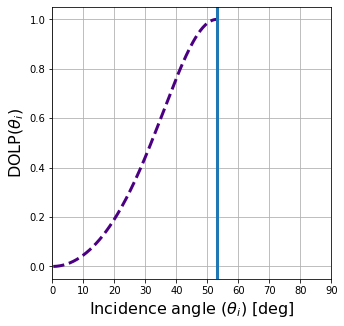

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.59814429283142 seconds
False
AoLP time:  0.042973995208740234 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [38:15<01:32, 30.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02998208999633789 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.042975664138793945 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


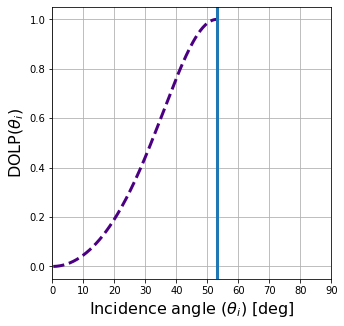

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.7688889503479 seconds
False
AoLP time:  0.04997134208679199 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [38:46<01:01, 30.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03497886657714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.041974782943725586 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


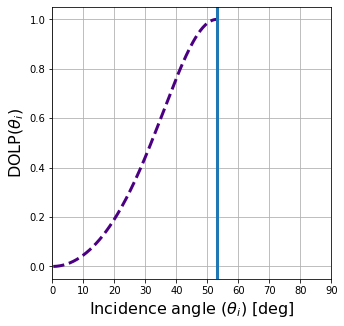

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.32759714126587 seconds
False
AoLP time:  0.046975135803222656 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [39:17<00:30, 30.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029979467391967773 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.041975975036621094 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


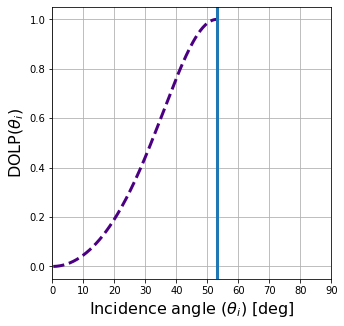

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.29147720336914 seconds
False
AoLP time:  0.04597330093383789 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [39:52<00:00, 31.97s/it]


In [13]:
i=-1
cumul_height_map = np.zeros(im_theta1.shape, dtype = 'complex')
for filename2 in tqdm(filenames): #
    i+=1
    im_theta2, im_phi2 = theta_phi(filename2, file_location,
                               material = 'water',
                               flat_field_correct = 1,
                               gaussian_smoothing_sigma = 0,
                               dark_files_location= dark_files_location, flat_files_location= flat_files_location,
                               num_images= NUM_IMAGES, correction_angle=0)

    raw_img2 = cv2.imread(os.path.join(file_location, filename2))
    
    # get slopes and height maps
    s_x = np.tan(np.radians((im_theta2 - im_theta1)))
    s_y = np.tan(np.radians((im_phi2 - im_phi1)))
    s_hat_x, s_hat_y = slopeFieldFFT(s_x, s_y, suppress_fig = 1)
    height_map = slope2height(s_hat_x, s_hat_y)
    all_height_maps[:,:,i] = height_map
    all_sx_maps[:,:,i] = s_x
    all_sy_maps[:,:,i] = s_y
    all_raw_frames_0filter[:,:,i] = raw_img2[::2,::2,0]

In [14]:
all_data_dict = {'all_height_maps': all_height_maps, 'all_sx_maps': all_sx_maps, \
                 'all_sy_maps':all_sy_maps, 'all_raw_frames_0filter':all_raw_frames_0filter}

tic = time.time()
with open(os.path.join(save_location,data_filename), 'wb') as handle:
    pickle.dump(all_data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('time taken = ', time.time() - tic)

time taken =  10.15992546081543


In [15]:
# for k in all_data_dict_loaded.keys():
#     print(all_data_dict_loaded[k].all() == all_data_dict[k].all())

In [16]:
# time_mean_height_map = cumul_height_map/len(filenames)

## Plot the manually generated facets - Algebraic method

In [17]:
# import numpy as np

# def rotationX(alpha):
#     temp  = [[1, 0, 0],\
#              [0, np.cos(alpha), -np.sin(alpha)],
#              [0, np.sin(alpha), np.cos(alpha)]]
#     return temp

# def rotationY(alpha):
#     temp  = [[np.cos(alpha), 0, np.sin(alpha)],\
#              [0, 1, 0],
#              [-np.sin(alpha), 0, np.cos(alpha)]]
#     return temp

# rows, cols = im_theta1.shape

# x = np.arange(0, cols)
# y = np.arange(0, rows)

# X, Y = np.meshgrid(x,y)
# Z = np.zeros((rows,cols)) # Z = 0 at node (0,0)


# # parameters of the any plane facet that need to keeo updating
# nx = np.zeros((rows,cols))
# ny = np.zeros((rows,cols))
# nz = np.zeros((rows,cols))

# visited = np.zeros((rows,cols))
# d = np.zeros((rows,cols))
# visited[0,0]  = 1

# # evaluate the normals nx, ny, nz
# delta_theta = np.radians(im_theta2 - im_theta1)
# delta_phi = np.radians(im_phi2 - im_phi1)
# for i in tqdm(range(rows)):
#     for j in range(cols):
#         temp = rotationX(delta_theta[i,j]) @ np.array([0,0,1]).reshape(3,1)
#         nx[i,j] = temp[0]

#         temp = rotationY(delta_phi[i,j]) @ np.array([0,0,1]).reshape(3,1)
#         ny[i,j] = temp[0]

# nz = np.sqrt(1 - nx**2 - ny**2)
# assert nz.shape == im_theta1.shape

In [18]:
# for i in tqdm(range(rows)):
#     for j in range(cols):
#         if i==0 and j!=0: # Z = 0 at node (0,0)
#             Z[i,j] = -d[i,j-1] - nx[i,j-1]*X[i,j] - ny[i,j-1]*Y[i,j]
#             Z[i,j]/= nz[i,j-1]
#         elif i!=0 and j==0:
#             Z[i,j] = -d[i-1,j] - nx[i-1,j]*X[i,j] - ny[i-1,j]*Y[i,j]
#             Z[i,j]/= nz[i-1,j]
#         elif i!=0 and j!=0:
#             Z_north= -d[i-1,j] - nx[i-1,j]*X[i,j] - ny[i-1,j]*Y[i,j]
#             Z_north/= nz[i-1,j]
            
#             Z_west = -d[i,j-1] - nx[i,j-1]*X[i,j] - ny[i,j-1]*Y[i,j]
#             Z_west/= nz[i,j-1]
            
#             Z_diag = -d[i-1,j-1] - nx[i-1,j-1]*X[i,j] - ny[i-1,j-1]*Y[i,j]
#             Z_diag/= nz[i-1,j-1]

#             Z[i,j] = np.mean([Z_west, Z_north, Z_diag])
#         d[i,j] = -nx[i,j]*X[i,j]- ny[i,j]*Y[i,j] - nz[i,j]*Z[i,j]
#         visited[i,j] = 1


In [19]:
# plt.imshow(Z)
# plt.colorbar()